# Proyecto Machine Learning
+ # Bank Customer Churn Detection
+ ## **Exploración y procesamiento del Dataset:** [Kaggle - Bank Customer Data for Customer Churn](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)

Librerías necesarias:

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Leemos el Dataset original "Customer-Churn-Records.csv"

In [47]:
import os
print(os.getcwd())

c:\Users\Steven\Desktop\Bank_Customer_Churn_Detection\Proyecto_Machine_Learning_Bank_Customer_Churn_Detection\noteooks


In [48]:
df = pd.read_csv("../data_raw/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [50]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


El Target **"Exited"** está desbalanceado:

,count
Exited,
0,7962
1,2038


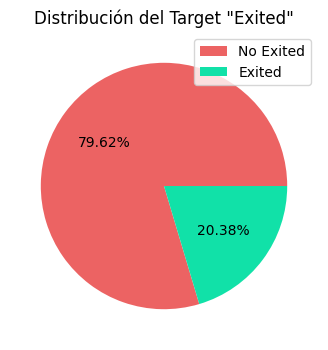

In [51]:
colores = ['#ec6363', '#11e1a8']
plt.figure(figsize=(4,4))
plt.pie(df['Exited'].value_counts(),
        autopct='%1.2f%%',
        colors=colores)
plt.title('Distribución del Target "Exited"')
plt.legend(['No Exited', 'Exited'], loc='upper right');

exited_situacion = pd.DataFrame(df["Exited"].value_counts())
exited_situacion

Eliminamo columnas que no aportan relevancia al proyecto:

In [52]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [53]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

El target al final del Dataset:

In [54]:
df = df.assign(Exited=df.pop('Exited'))

In [55]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0


Visualizaciones del Dataset:

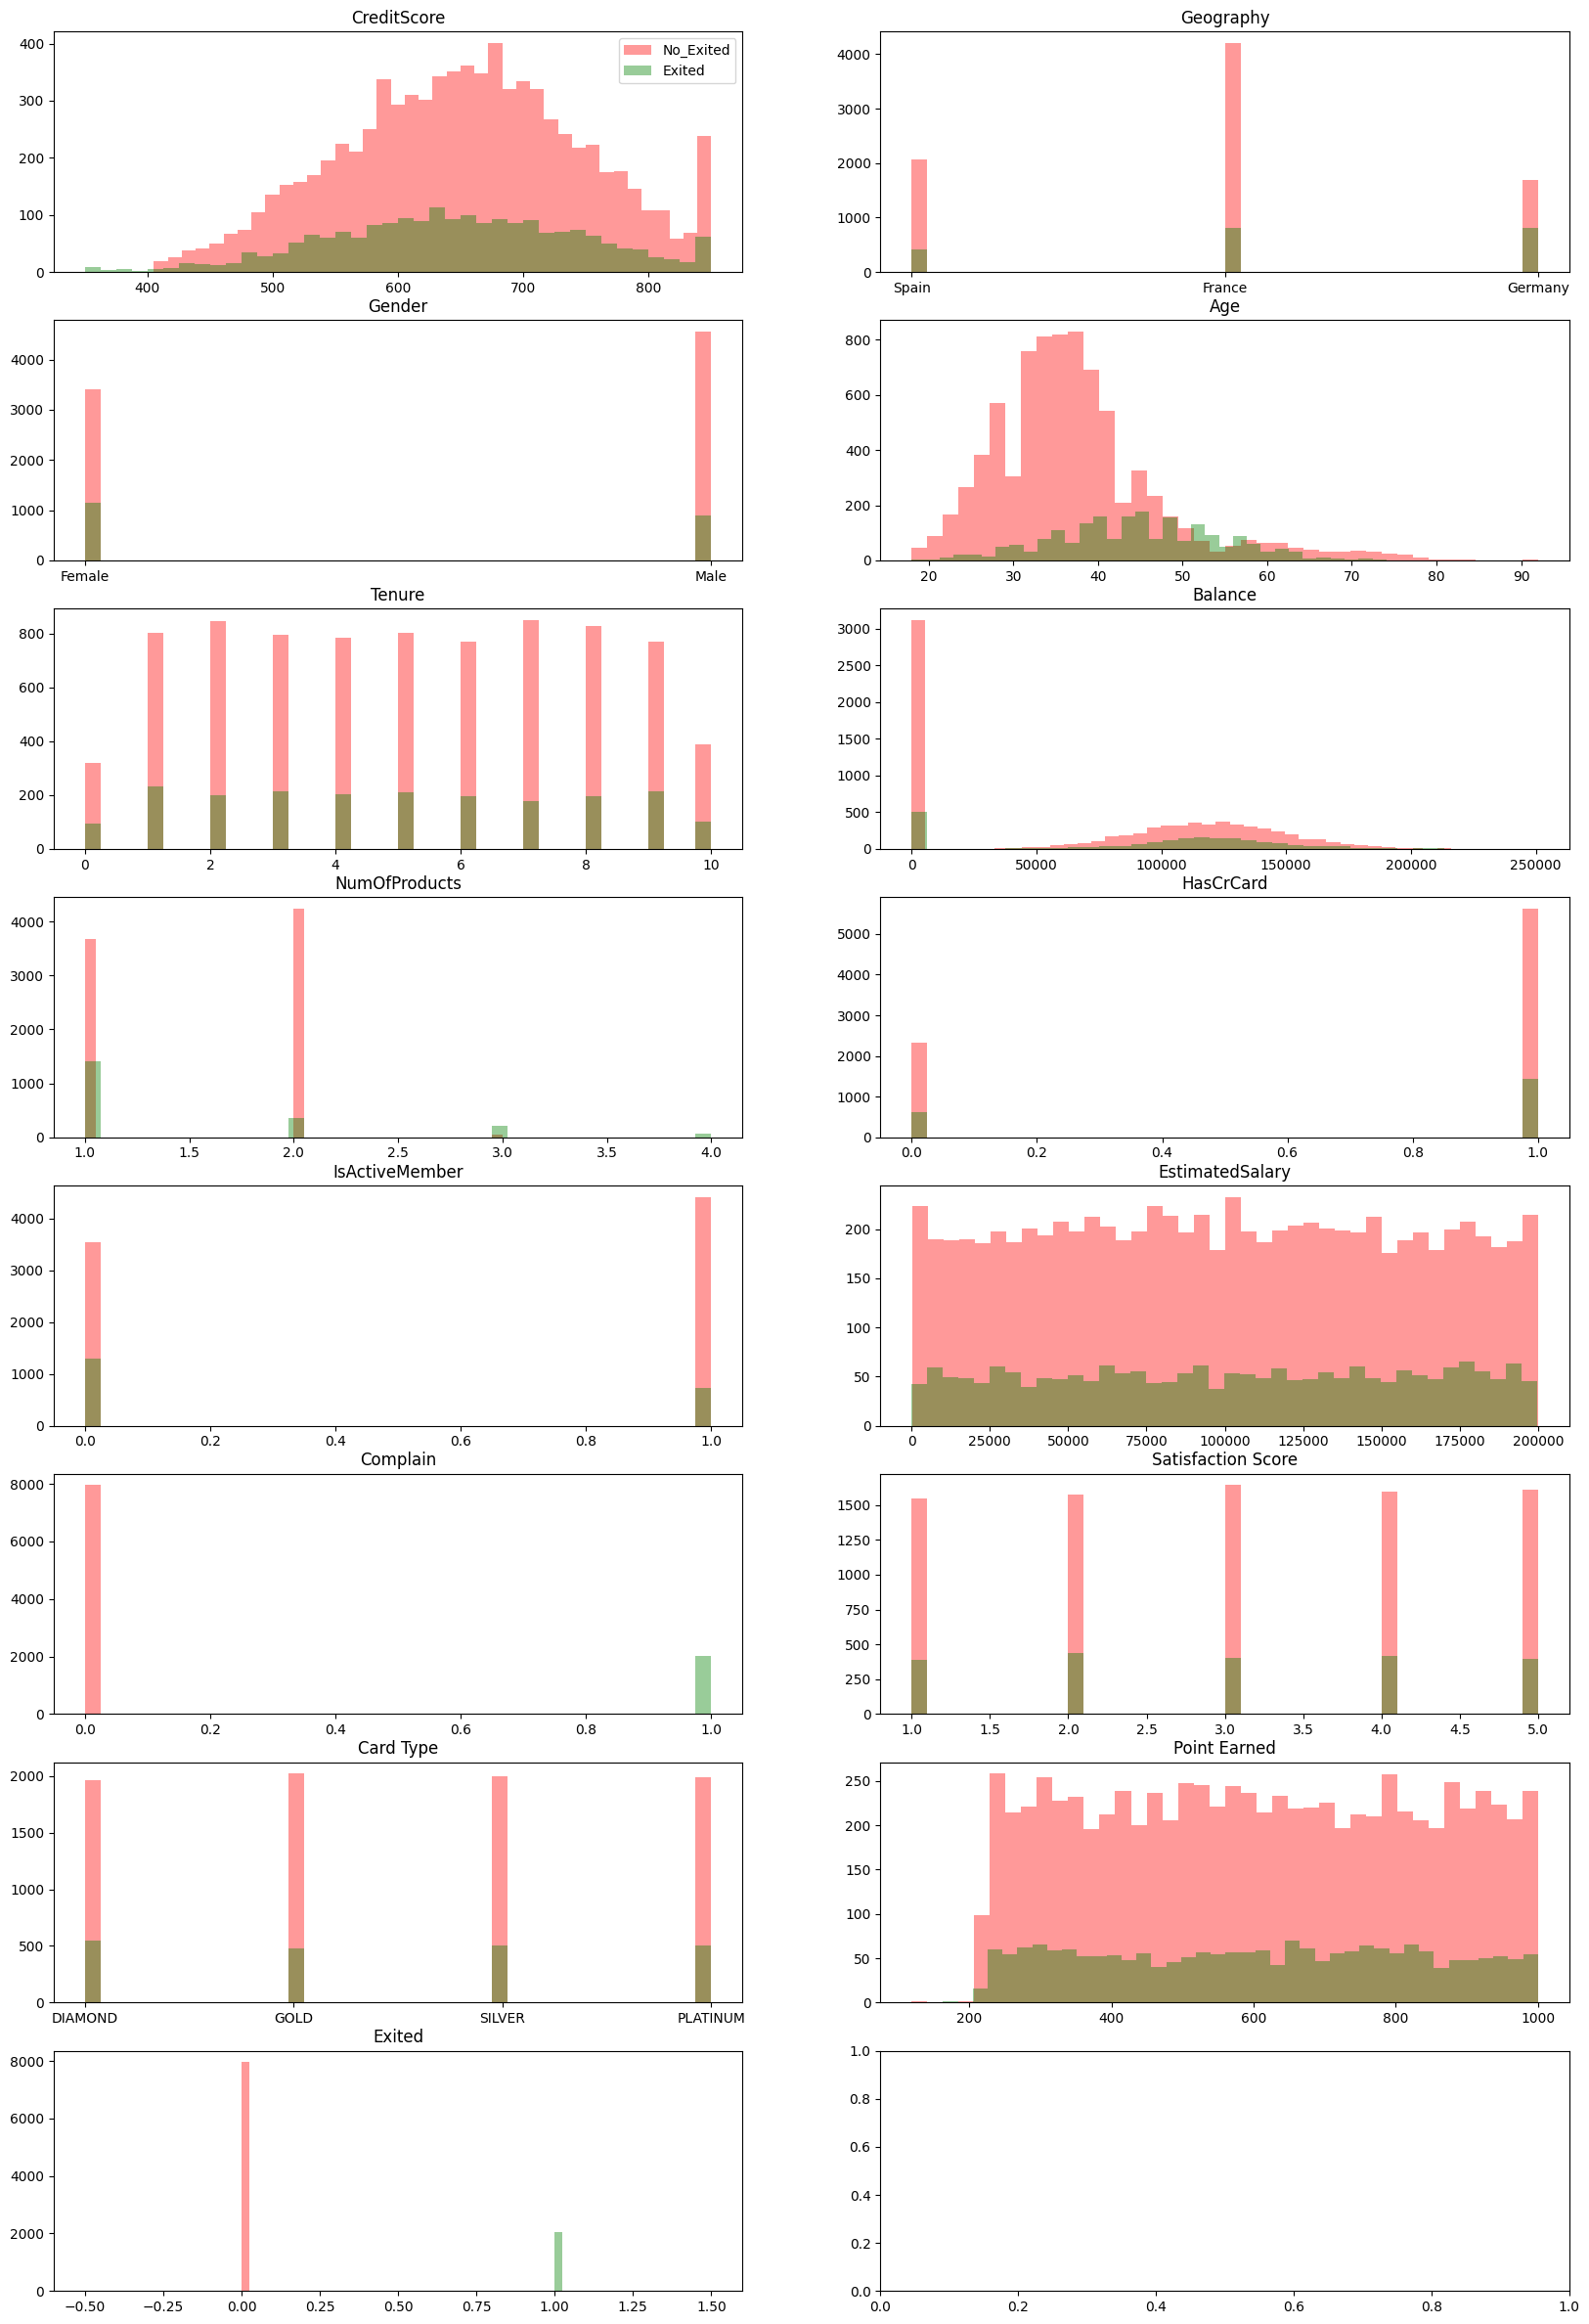

In [56]:
fig, axis = plt.subplots(8,2, figsize=(20,30))

No_Exited = df[df['Exited']==0]
Exited = df[df['Exited']==1]
axes = axis.ravel()
for i in range(len(df.columns)):
    axes[i].hist(No_Exited.values[:,i], bins=40, color='r', alpha=0.4)
    axes[i].hist(Exited.values[:,i], bins=40, color='g', alpha=0.4)
    axes[i].set_title(df.columns[i])

axes[0].legend(['No_Exited', 'Exited']);

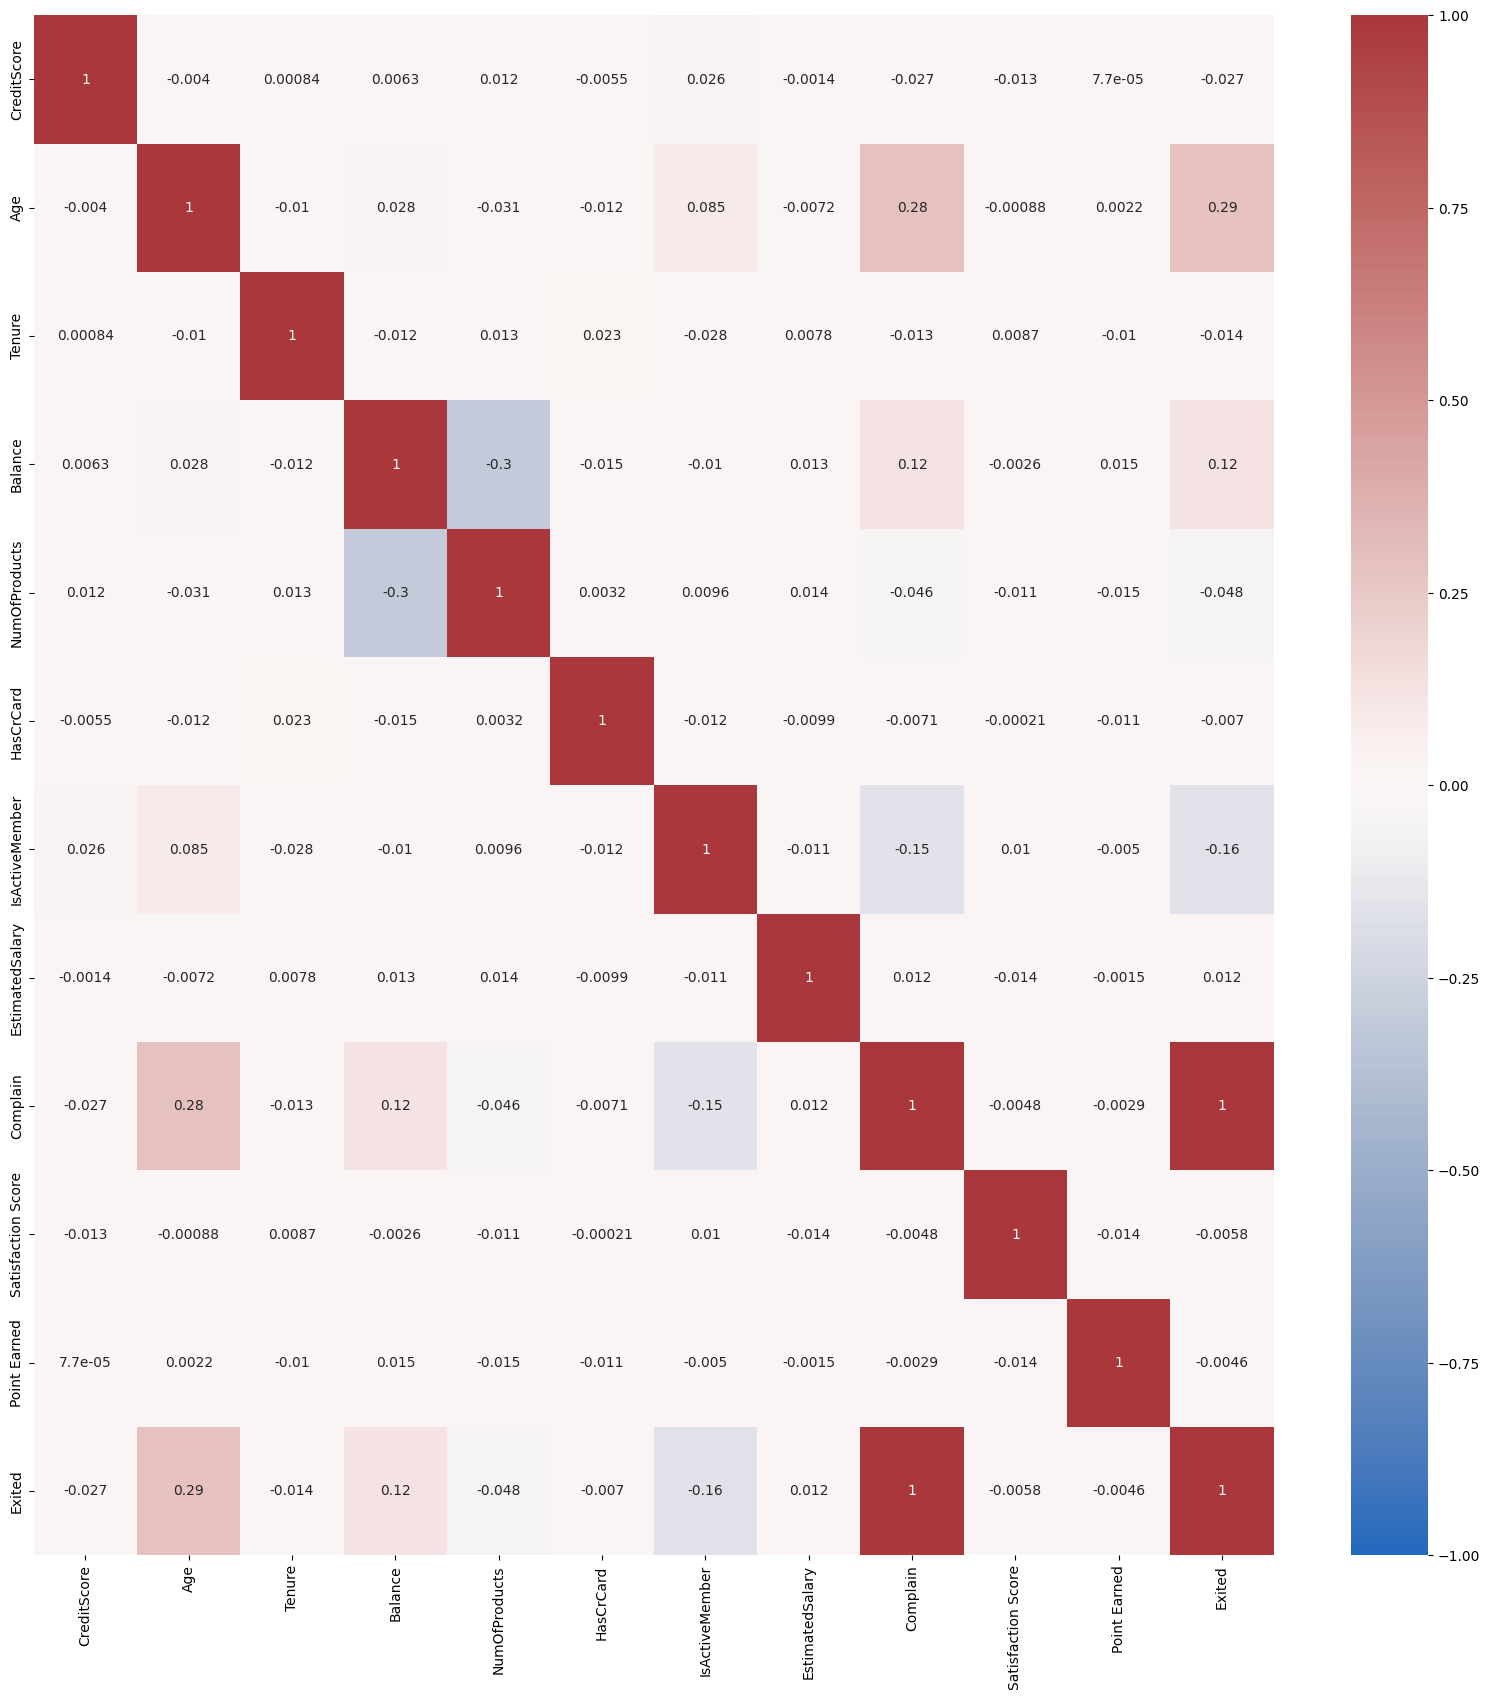

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only= True),
           vmin=-1,
           vmax=1,
           cmap=sns.color_palette("vlag", as_cmap=True),
           annot=True);

Eliminamos "Complain", ya que explica los mismo que el target "Exited":

In [58]:
df.drop(columns=["Complain"], inplace=True)

Transformación de variables: tipos

In [59]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
Exited                  int64
dtype: object

In [60]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [61]:
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

In [62]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [63]:
geography_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
df['Geography'] = df['Geography'].map(geography_mapping)

In [64]:
df["Card Type"].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [65]:
card_type_mapping = {'DIAMOND': 0, 'GOLD': 1, 'PLATINUM': 2, 'SILVER': 3}
df['Card Type'] = df['Card Type'].map(card_type_mapping)

Guardamos el primer dataset en el que hemos analizado y procesado para crear el modelo baseline.

In [66]:
df.to_csv("../data_processed/Churn_processed.csv", index = False)

Dividimos los datos del Dataset procesado en train y test:


In [67]:
# Train 
df_train = df.iloc[:8000, :]
df.to_csv("../data_processed/Train_Churn_processed.csv", index = False)

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8000 non-null   int64  
 1   Geography           8000 non-null   int64  
 2   Gender              8000 non-null   int64  
 3   Age                 8000 non-null   int64  
 4   Tenure              8000 non-null   int64  
 5   Balance             8000 non-null   float64
 6   NumOfProducts       8000 non-null   int64  
 7   HasCrCard           8000 non-null   int64  
 8   IsActiveMember      8000 non-null   int64  
 9   EstimatedSalary     8000 non-null   float64
 10  Satisfaction Score  8000 non-null   int64  
 11  Card Type           8000 non-null   int64  
 12  Point Earned        8000 non-null   int64  
 13  Exited              8000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 875.1 KB


In [69]:
# Test
df_test = df.iloc[8000:, :]
df_test.to_csv("../data_processed/Test_Churn_processed.csv", index = False)

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 8000 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         2000 non-null   int64  
 1   Geography           2000 non-null   int64  
 2   Gender              2000 non-null   int64  
 3   Age                 2000 non-null   int64  
 4   Tenure              2000 non-null   int64  
 5   Balance             2000 non-null   float64
 6   NumOfProducts       2000 non-null   int64  
 7   HasCrCard           2000 non-null   int64  
 8   IsActiveMember      2000 non-null   int64  
 9   EstimatedSalary     2000 non-null   float64
 10  Satisfaction Score  2000 non-null   int64  
 11  Card Type           2000 non-null   int64  
 12  Point Earned        2000 non-null   int64  
 13  Exited              2000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 218.9 KB
